In [9]:
import os
import re
import pickle
import pandas as pd
import numpy as np  
from sklearn.metrics import mean_squared_error  
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [10]:
size_model_path = 'Model_Create_and_Results1/Pvk_additives/0_Create_Ground_Truth_Model/pvkadditives/pvk_rfr_size.pkl'

with open(size_model_path, 'rb') as f:
    rf_regressor = pickle.load(f)

In [11]:
def pvk_crystal_predict(df: pd.DataFrame, 
                        pvk_rfr: RandomForestRegressor, 
                        ):
    
    # scroe predict
    pvk_size_feature_list = ['Reagent1 (ul)','Reagent2 (ul)','Reagent3 (ul)','Reagent4 (ul)','lab_code','ATSC5v', 'AATSC5Z', 'MATS8se']
    df_size = df[pvk_size_feature_list]

    return pvk_rfr.predict(df_size), df[pvk_size_feature_list]


In [12]:
cycle_count = ['c2'] # 目前跑完的cycle 假設是第0個跑完 想要有地1個cycle的predictor 就設0 假設cycle1結束 就設1 這樣會做cycle1的predictor
finished_cycle = 2
#methods = ['ABC', 'GA', 'PSO', 'SA']
methods = ['PSO','ABC']
methods = ['PSO/round6','PSO/round7','PSO/round8','PSO/round9','PSO/round10']
methods = ['BO/round1', 'BO/round2', 'BO/round3', 'BO/round4','BO/round5','BO/round6', 'BO/round7', 'BO/round8', 'BO/round9',  'BO/round10']
methods = ['Random/round1', 'Random/round2', 'Random/round3', 'Random/round4', 'Random/round5','Random/round6', 'Random/round7', 'Random/round8', 'Random/round9', 'Random/round10']

methods = ['PSO-re/round1', 'PSO-re/round2', 'PSO-re/round3', 'PSO-re/round4',  'PSO-re/round5',
'PSO-re/round6', 'PSO-re/round7', 'PSO-re/round8', 'PSO-re/round9',  'PSO-re/round10']

methods = ['ABC_T/round4', 'ABC_T/round5',
            'ABC_T/round6', 'ABC_T/round7', 'ABC_T/round8', 'ABC_T/round9', 'ABC_T/round10']
            
pattern = r"\d{8}\w+_Report\.csv"
# pvk_size_feature_list = ['Reagent1 (ul)','Reagent2 (ul)','Reagent3 (ul)','Reagent4 (ul)','lab_code','AATS3i','ATSC5Z','AATSC5Z']
pvk_size_feature_list = ['Reagent1 (ul)','Reagent2 (ul)','Reagent3 (ul)','Reagent4 (ul)','lab_code','ATSC5v', 'AATSC5Z', 'MATS8se']


parent_directory = 'Model_Create_and_Results1/Pvk_additives'
preprocessing_for_analysis = os.path.join(parent_directory, '1_Preprocessing_for_Analysis')
make_new_data_predictor = os.path.join(parent_directory, '3_Make_New_Data_Predictor')

for method in methods:
    prediction_folder = os.path.join(preprocessing_for_analysis, method, cycle_count[-1])
    for filename in os.listdir(prediction_folder):
        if re.match(pattern, filename):

            file_path = os.path.join(prediction_folder, filename)
            print(file_path)
            pred_df = pd.read_csv(file_path)
            pred_df = pred_df.rename(columns={
            'Reagent1_(ul)': 'Reagent1 (ul)',
            'Reagent2_(ul)': 'Reagent2 (ul)',
            'Reagent3_(ul)': 'Reagent3 (ul)',
            'Reagent4_(ul)': 'Reagent4 (ul)'})
            gt_value = pvk_crystal_predict(pred_df, rf_regressor)
            
            pred_df = pred_df.drop(columns=['Folder Name', 'crystal_size_Std', 'Fitness'])
            pred_df.rename(columns={'Smiles': 'SMILES'}, inplace=True)
            pred_df['crystal_score'] = 0
            pred_df['crystal_size'] = gt_value[0]
            pred_df = pred_df.sort_values(by='crystal_size', ascending=False)
            pred_df = pred_df[:10]
            if len(cycle_count[0]) == 3:
                pred_df.to_csv(os.path.join(make_new_data_predictor, method, f'cycle{int(cycle_count[-1][2])+10}_pred.csv'), index=False)
                print('>10 csv saved')
                df_gt = pd.read_csv(os.path.join(make_new_data_predictor, method, f'cycle{int(cycle_count[-1][2])+10}.csv'))
                df_gt = pd.concat([df_gt, pred_df], axis=0)
                df_gt.to_csv(os.path.join(make_new_data_predictor,method, f'cycle{int(cycle_count[-1][2]) + 11}.csv'), index=False)
            else:
                pred_df.to_csv(os.path.join(make_new_data_predictor, method,  f'cycle{int(cycle_count[-1][1])}_pred.csv'), index=False)
                print('csv saved')
                df_gt = pd.read_csv(os.path.join(make_new_data_predictor, method,f'cycle{int(cycle_count[-1][1])}.csv'))
                df_gt = pd.concat([df_gt, pred_df], axis=0)
                df_gt.to_csv(os.path.join(make_new_data_predictor,method,f'cycle{int(cycle_count[-1][1]) + 1}.csv'), index=False)

/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC_T/round4/c2/20250808pvk_Report.csv
csv saved
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC_T/round5/c2/20250808pvk_Report.csv
csv saved
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC_T/round6/c2/20250808pvk_Report.csv
csv saved
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC_T/round7/c2/20250808pvk_Report.csv
csv saved
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC_T/round8/c2/20250808pvk_Report.csv
csv saved
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC_T/round9/c2/20250808pvk_Report.csv
csv saved
/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/1_Preprocessing_for_Analysis/ABC_T/round10/c2/20250808pvk_Report.csv
csv saved


## 重新訓練predictor

In [13]:
import os
import re
import pickle
import pandas as pd
import numpy as np  
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import torch
from matplotlib import pyplot as plt
import sys

import test
from sklearn.model_selection import cross_val_score

"""
set parameters
"""

parameters = {
    #'n_estimators': [100, 200, 300],
    'n_estimators': [20, 50, 80],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.005, 0.01, 0.05],
    'subsample': [0.7, 0.8, 0.9],
    #'subsample': [0.3, 0.4, 0.5],
    'colsample_bytree': [0.7, 0.8, 0.9],
    #'colsample_bytree': [0.3, 0.4, 0.5],
    #"reg_lambda": [10, 100, 500],
    #"min_child_weight": [5, 10, 20]
}


"""
generate latent space vectors
"""

# get encoder info in X
import sys
sys.path.append('VAE_model/cpu')
from fast_jtnn import *

# setting VAE params
model_path = "VAE_model/model.epoch-39"
vocab_path = "VAE_model/model.epoch-39/smi_vocab-2.txt"

proc_list = ['Reagent1 (ul)','Reagent2 (ul)','Reagent3 (ul)','Reagent4 (ul)', 'lab_code']
param_list = ['Reagent1 (ul)','Reagent2 (ul)','Reagent3 (ul)','Reagent4 (ul)', 'lab_code', 'crystal_size']

# Model parameters
hidden_size = 450
latent_size = 32
process_cond_size = 5
depthG = 20
depthT = 3
#batch_size = 40

# Load vocabulary
vocab = [x.strip("\r\n ") for x in open(vocab_path)]
vocab = Vocab(vocab)

# Load the model
model = JTNNVAE(vocab, hidden_size, latent_size, depthT, depthG)
model.load_state_dict(torch.load(model_path, map_location='cpu'))
model.cpu()
model.eval()

X = {}
Y = {}

for method in methods:
    # load the latent vectors
    train_data = pd.DataFrame(pd.read_csv(os.path.join(make_new_data_predictor, f'{method}/cycle{finished_cycle+1}.csv')))
    #test_data = pd.DataFrame(pd.read_csv('/home/ianlee/opt_ian/Model_Create_and_Results1/Pvk_additives/0_Create_Surrogate_Model/cycle0_data_test.csv'))
    train_smiles = train_data['SMILES'].tolist()
    #test_smiles = test_data['SMILES'].tolist()
    latent_train = []
    train_param = []
    for i in range(len(train_smiles)):
        try:
            latent = model.encode_latent_mean([train_smiles[i]])
            latent = latent.detach().cpu().numpy()
            latent_train.append(latent[0])
            train_param.append(train_data.iloc[i][param_list].values)
        except:
            print(train_smiles[i], 'with process conditions and crystal size', train_data.iloc[i][param_list].values, 'failed to encode')
            
    latent_train = np.array(latent_train)
    print(latent_train.shape)
    #latent_test = model.encode_latent_mean(test_smiles)
    #latent_test = latent_test.detach().cpu().numpy()

    train_param = np.array(train_param)
    train_proc = train_param[:, :5]
    train_X = np.concatenate((latent_train, train_proc), axis=1)
    print(train_X.shape)
    crystal_size = train_param[:, 5]

    X[method] = train_X
    Y[method] = crystal_size

    #train_proc = train_data[proc_list].values
    #test_proc = test_data[proc_list].values

[18:33:49] WARNING: not removing hydrogen atom without neighbors


(40, 32)
(40, 37)
(40, 32)
(40, 37)
(40, 32)
(40, 37)
(40, 32)
(40, 37)
(40, 32)
(40, 37)
(40, 32)
(40, 37)
(40, 32)
(40, 37)


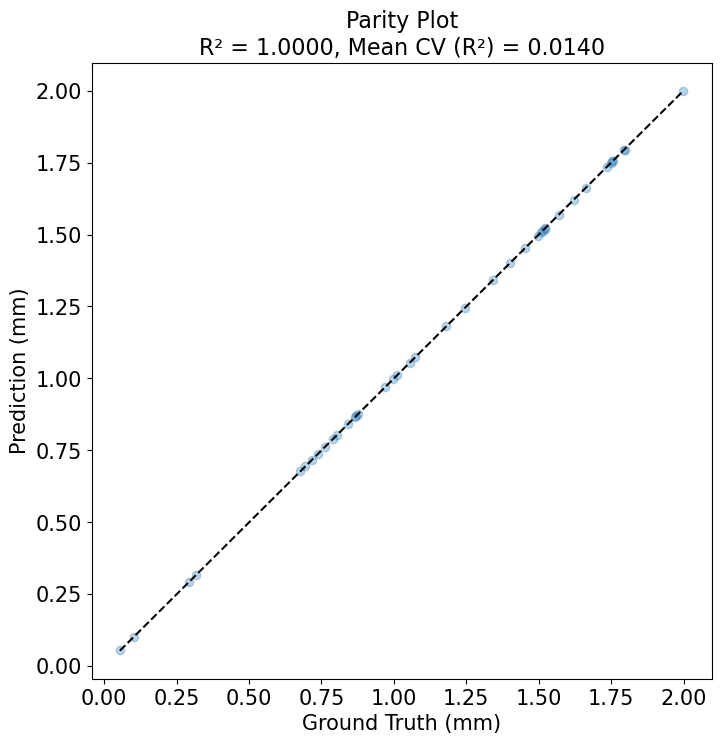

XGBRegressor
MSE between Train and Prediction:  2.5475450094822876e-07
R2 between Train and Prediction:  0.9999989641372211
Mean of Training Data y:  1.1531097057649797
Std Dev of Training Data y:  0.495917939457055
Cross Validation Score:  [-0.34137359 -0.0480937   0.05449282  0.37384817  0.03127497]
Mean Corss Validation Score:  0.014029732036224174


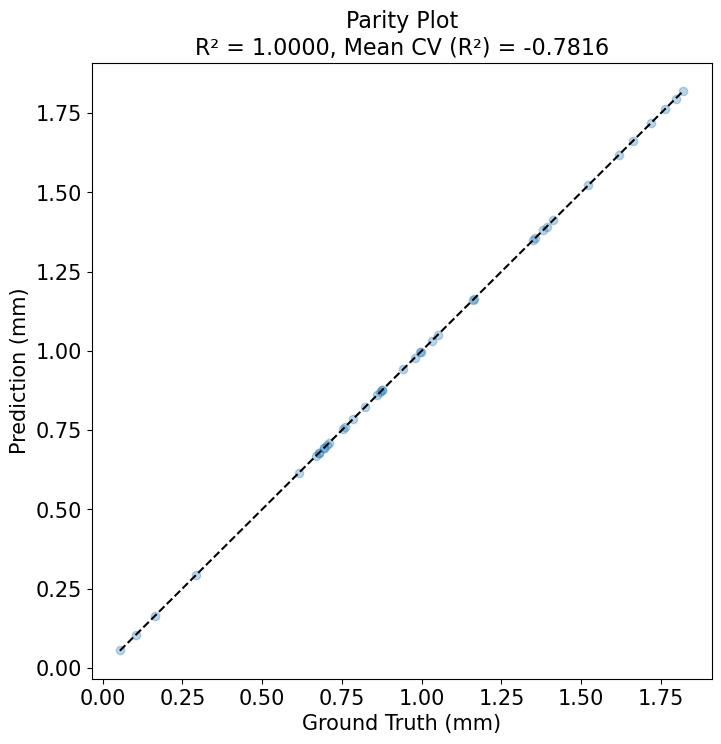

XGBRegressor
MSE between Train and Prediction:  1.9296094725537747e-07
R2 between Train and Prediction:  0.9999990654493514
Mean of Training Data y:  0.994204529300276
Std Dev of Training Data y:  0.45439473390998397
Cross Validation Score:  [ 0.373217   -1.29224873  0.2564771  -1.47960306 -1.76582211]
Mean Corss Validation Score:  -0.7815959606306377


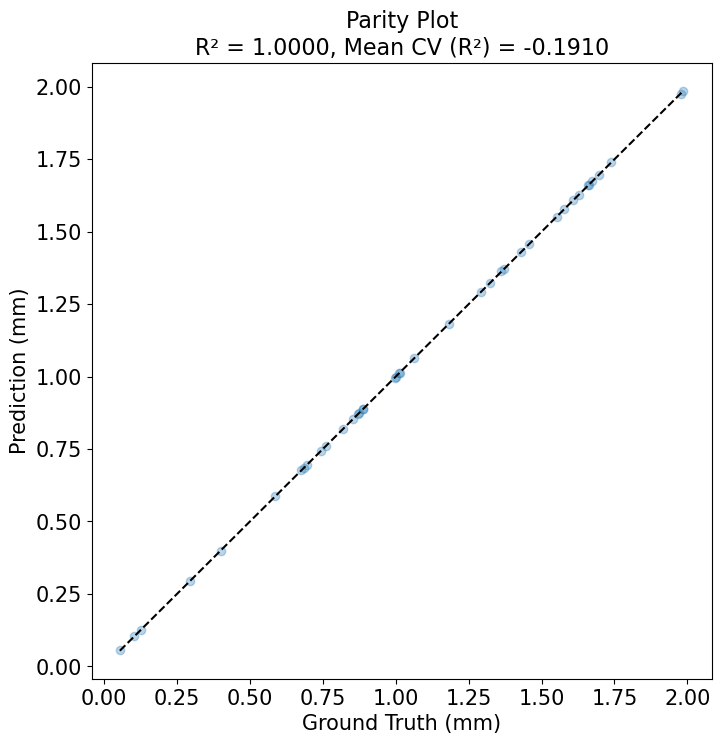

XGBRegressor
MSE between Train and Prediction:  2.0729302349797642e-07
R2 between Train and Prediction:  0.9999991934274618
Mean of Training Data y:  1.089559102789056
Std Dev of Training Data y:  0.506956420149072
Cross Validation Score:  [ 0.61939882 -1.9342775   0.5093835  -0.14484424 -0.0046245 ]
Mean Corss Validation Score:  -0.19099278466858877


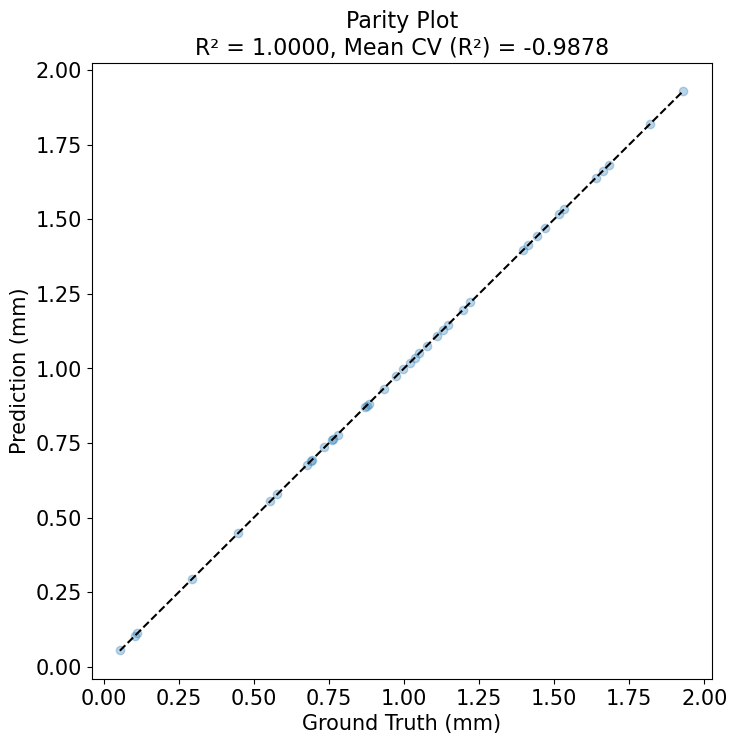

XGBRegressor
MSE between Train and Prediction:  2.410545259261183e-07
R2 between Train and Prediction:  0.9999988705440422
Mean of Training Data y:  1.0065073159682876
Std Dev of Training Data y:  0.46197980869943683
Cross Validation Score:  [-1.79675806 -1.89477347  0.10374199  0.16196918 -1.5130647 ]
Mean Corss Validation Score:  -0.9877770134346845


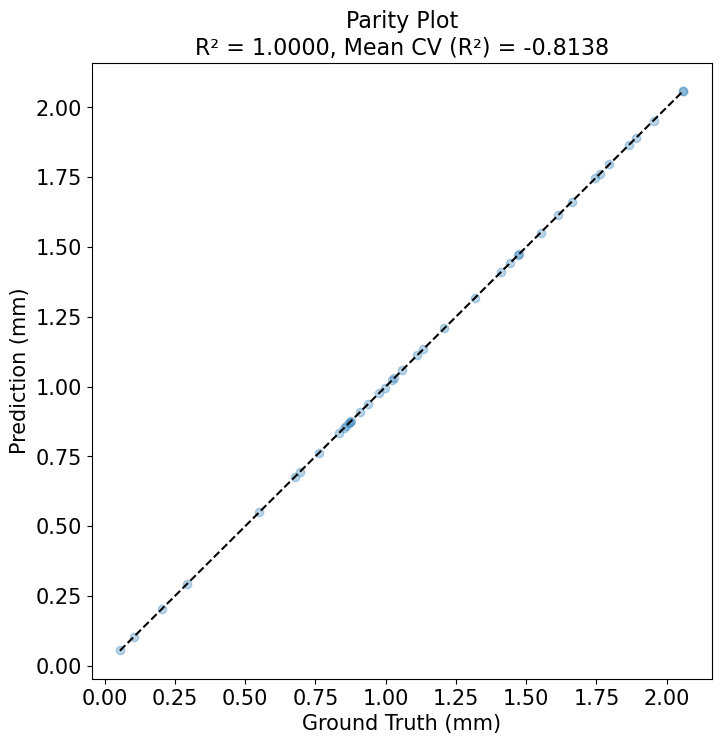

XGBRegressor
MSE between Train and Prediction:  2.211440949568697e-07
R2 between Train and Prediction:  0.9999992039706894
Mean of Training Data y:  1.1488338476800795
Std Dev of Training Data y:  0.5270758818286986
Cross Validation Score:  [ 0.3473936  -0.26134551  0.48926195 -0.99189644 -3.65249978]
Mean Corss Validation Score:  -0.8138172367192862


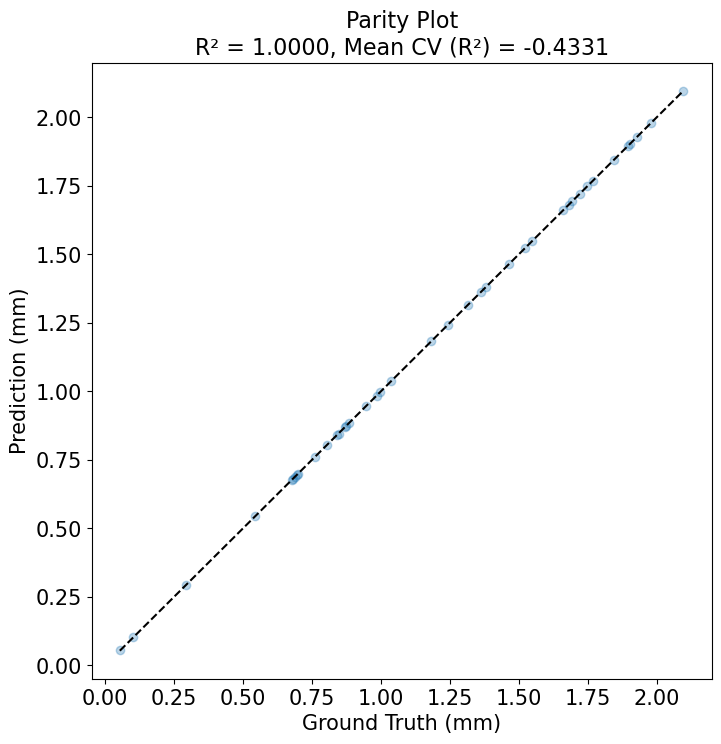

XGBRegressor
MSE between Train and Prediction:  2.119515450947207e-07
R2 between Train and Prediction:  0.9999992596922637
Mean of Training Data y:  1.1808893343429463
Std Dev of Training Data y:  0.5350719067344294
Cross Validation Score:  [-0.78322082 -0.70987939  0.63916175 -0.37112863 -0.94038825]
Mean Corss Validation Score:  -0.43309106755201265


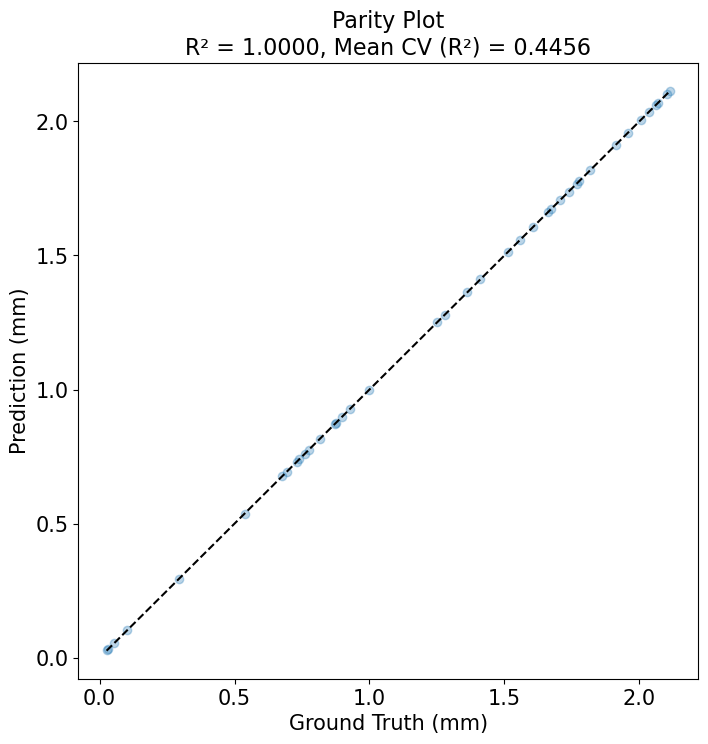

XGBRegressor
MSE between Train and Prediction:  2.7501497527350145e-07
R2 between Train and Prediction:  0.9999993314719159
Mean of Training Data y:  1.2295423438369213
Std Dev of Training Data y:  0.6413843272200586
Cross Validation Score:  [0.38437858 0.50489025 0.60146061 0.50043641 0.23693829]
Mean Corss Validation Score:  0.44562082844783674


In [14]:
"""
train the XGBoost model
"""

for method in methods:

    xgb_folder = os.path.join(make_new_data_predictor, f'{method}/cycle{finished_cycle+1}')

    #print(np.shape(latent_train),np.shape(train_proc))
    X_train, y_train = X[method], Y[method]
    #X_train, y_train = np.concatenate((latent_train, train_proc), axis=1), crystal_size
    #X_test, y_test = np.concatenate((latent_test, test_proc), axis=1), test_data['crystal_size'].values
    model_xgb = XGBRegressor(objective='reg:squarederror')
    grid_search = GridSearchCV(model_xgb, parameters, cv=5, scoring='neg_mean_squared_error') #5-fold cross validation
    grid_search.fit(X_train, y_train)
    model_xgb.fit(X_train, y_train) #10-fold cross validation
                
    y_pred = model_xgb.predict(X_train)
    #test_pred = model_xgb.predict(X_test)

    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    #r2_test = r2_score(y_test, test_pred)

    mean = np.mean(y_train)  
    std = np.std(y_train)  
    val = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='r2')


    plt.figure(figsize=(8, 8))
    plt.scatter(y_train, y_pred, alpha=0.3)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
    plt.xlabel('Ground Truth (mm)', fontsize = 15)
    plt.ylabel('Prediction (mm)', fontsize = 15)
    plt.title(
    f"Parity Plot\nR² = {r2:.4f}, Mean CV (R²) = {np.mean(val):.4f}",
    fontsize=16)
    plt.savefig(os.path.join(make_new_data_predictor, f'{method}/c{finished_cycle+1}.png'))
    plt.show()

    print('XGBRegressor')
    print("MSE between Train and Prediction: ", mse)
    print("R2 between Train and Prediction: ", r2)
    #print("R2 between Test and Prediction: ", r2_test)
    print("Mean of Training Data y: ", mean)
    print("Std Dev of Training Data y: ", std)
    print("Cross Validation Score: ", val)
    print("Mean Corss Validation Score: ", np.mean(val))

    results = pd.DataFrame(grid_search.cv_results_)
    results = results.sort_values("mean_test_score", ascending=False)
    results = results[["mean_test_score", "params"]]
    results = results[:10]

    count = 0



    for i, row in results.iterrows():
        # 取得超參組合
        hyp = row[1]

        # 訓練模型
        model = XGBRegressor(**hyp)
        model.fit(X_train, y_train)
                #eval_set=[(X_test, y_test)],
            # early_stopping_rounds=5)

        # 儲存模型
        with open(os.path.join(xgb_folder,f"pvk_size_xgboost{count}.pkl"), "wb") as f:
            pickle.dump(model, f)
        count += 1